In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
# importovanie potrebných knižníc

/var/folders/lc/0tq3t3m97j18yp2pgzc9h2vw0000gn/T/ipykernel_15653/2991630361.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# inštalácia balíkov python
%pip install mlxtend
%pip install - -upgrade pip
%pip install networkx

Note: you may need to restart the kernel to use updated packages.

Usage:   
  /opt/homebrew/opt/python@3.11/bin/python3.11 -m pip install [options] <requirement specifier> [package-index-options] ...
  /opt/homebrew/opt/python@3.11/bin/python3.11 -m pip install [options] -r <requirements file> [package-index-options] ...
  /opt/homebrew/opt/python@3.11/bin/python3.11 -m pip install [options] [-e] <vcs project url> ...
  /opt/homebrew/opt/python@3.11/bin/python3.11 -m pip install [options] [-e] <local project path> ...
  /opt/homebrew/opt/python@3.11/bin/python3.11 -m pip install [options] <archive url/path> ...

no such option: -u
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
# načitanie datasetu
df = pd.read_csv("stroke_data.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
# odstránenie stĺpca "id"
df = df.drop(columns=['id'])

In [5]:
# premenovanie atribútov z angličtiny do slovenčiny
df = df.rename(columns={'age': 'vek'})
df = df.rename(columns={'heart_disease': 'srdcova_choroba'})
df = df.rename(columns={'work_type': 'typ_prace'})
df = df.rename(columns={'smoking_status': 'fajcenie'})
df = df.rename(columns={'stroke': 'mrtvica'})
df = df.rename(columns={'Residence_type': 'typ_rezidencie'})
df = df.rename(columns={'avg_glucose_level': 'priemerna_hladina_glukozy'})
df = df.rename(columns={'gender': 'pohlavie'})
df = df.rename(columns={'ever_married': 'manželstvo'})
df = df.rename(columns={'hypertension': 'krvny_tlak'})

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   pohlavie                   5110 non-null   object 
 1   vek                        5110 non-null   float64
 2   krvny_tlak                 5110 non-null   int64  
 3   srdcova_choroba            5110 non-null   int64  
 4   manželstvo                 5110 non-null   object 
 5   typ_prace                  5110 non-null   object 
 6   typ_rezidencie             5110 non-null   object 
 7   priemerna_hladina_glukozy  5110 non-null   float64
 8   bmi                        4909 non-null   float64
 9   fajcenie                   5110 non-null   object 
 10  mrtvica                    5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


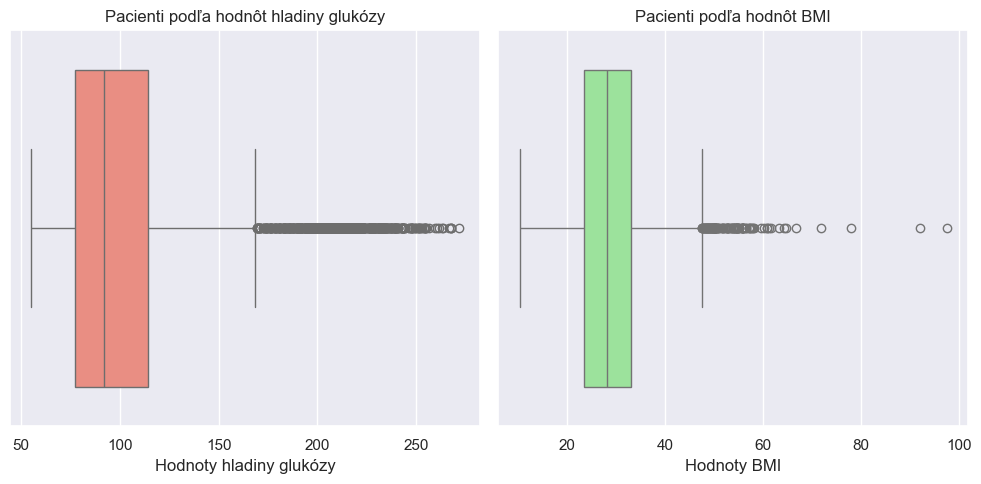

In [7]:
# Vytvorenie figúry a osi pre grafové objekty
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# boxplot pre priemernú hladinu glukózy
sns.boxplot(data=df, x="priemerna_hladina_glukozy", ax=axs[0], color='salmon')
axs[0].set_xlabel("Hodnoty hladiny glukózy")
axs[0].set_title("Pacienti podľa hodnôt hladiny glukózy")

# boxplot pre BMI
sns.boxplot(data=df, x="bmi", ax=axs[1], color='lightgreen')
axs[1].set_xlabel("Hodnoty BMI")
axs[1].set_title("Pacienti podľa hodnôt BMI")

plt.tight_layout()
plt.show()

In [8]:
# Spočítanie jednotlivých hodnôt atribútu bmi
print("Hodnoty pre atribút 'bmi':")
print(df.bmi.value_counts())

Hodnoty pre atribút 'bmi':
bmi
28.7    41
28.4    38
26.7    37
27.6    37
26.1    37
        ..
48.7     1
49.2     1
51.0     1
49.4     1
14.9     1
Name: count, Length: 418, dtype: int64


In [9]:
# Spočítanie jednotlivých hodnôt atribútu pohlavie
print("Hodnoty pre atribút 'pohlavie':")
print(df.pohlavie.value_counts())
print("\n")

# Spočítanie jednotlivých hodnôt atribútu srdcova_choroba
print("Hodnoty pre atribút 'srdcova_choroba':")
print(df.srdcova_choroba.value_counts())
print("\n")

# Spočítanie jednotlivých hodnôt atribútu typ_prace
print("Hodnoty pre atribút 'typ_prace':")
print(df.typ_prace.value_counts())

Hodnoty pre atribút 'pohlavie':
pohlavie
Female    2994
Male      2115
Other        1
Name: count, dtype: int64


Hodnoty pre atribút 'srdcova_choroba':
srdcova_choroba
0    4834
1     276
Name: count, dtype: int64


Hodnoty pre atribút 'typ_prace':
typ_prace
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64


In [10]:
# Spočítanie jednotlivých hodnôt atribútu vek
print("Hodnoty pre atribút 'vek':")
print(df.vek.value_counts())

Hodnoty pre atribút 'vek':
vek
78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.40       2
0.08       2
Name: count, Length: 104, dtype: int64


In [11]:
# Spočítanie jednotlivých hodnôt atribútu fajcenie
print("Hodnoty pre atribút 'fajcenie':")
print(df.fajcenie.value_counts())
print("\n")

# Spočítanie jednotlivých hodnôt atribútu mrtvica
print("Hodnoty pre atribút 'mrtvica':")
print(df.mrtvica.value_counts())
print("\n")

# Spočítanie jednotlivých hodnôt atribútu typ_rezidencie
print("Hodnoty pre atribút 'typ_rezidencie':")
print(df.typ_rezidencie.value_counts())

Hodnoty pre atribút 'fajcenie':
fajcenie
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64


Hodnoty pre atribút 'mrtvica':
mrtvica
0    4861
1     249
Name: count, dtype: int64


Hodnoty pre atribút 'typ_rezidencie':
typ_rezidencie
Urban    2596
Rural    2514
Name: count, dtype: int64


In [12]:
# Spočítanie jednotlivých hodnôt atribútu priemerna_hladina_glukozy
print("Hodnoty pre atribút 'priemerna_hladina_glukozy':")
print(df.priemerna_hladina_glukozy.value_counts())

Hodnoty pre atribút 'priemerna_hladina_glukozy':
priemerna_hladina_glukozy
93.88     6
91.68     5
91.85     5
83.16     5
73.00     5
         ..
111.93    1
94.40     1
95.57     1
66.29     1
85.28     1
Name: count, Length: 3979, dtype: int64


In [13]:
# Spočítanie jednotlivých hodnôt atribútu manželstvo
print("Hodnoty pre atribút 'manželstvo':")
print(df.manželstvo.value_counts())
print("\n")

# Spočítanie jednotlivých hodnôt atribútu krvny_tlak
print("Hodnoty pre atribút 'krvny_tlak':")
print(df.krvny_tlak.value_counts())

Hodnoty pre atribút 'manželstvo':
manželstvo
Yes    3353
No     1757
Name: count, dtype: int64


Hodnoty pre atribút 'krvny_tlak':
krvny_tlak
0    4612
1     498
Name: count, dtype: int64


In [14]:
# funkcia na nahradenie nezmyselných hodnôt 'Other' najčastejšou hodnotou pre daný atribút
def nahradenie(df, column_name):
    most_common_value = df[column_name].mode()[0]
    df.loc[df[column_name] == 'Other', column_name] = most_common_value
    return most_common_value

# atribút 'pohlavie'
print("Najčastejšia hodnota pre 'pohlavie':")
najcastejsie_pohlavie = nahradenie(df, 'pohlavie')
print(najcastejsie_pohlavie)

# atribút 'vek'
print("Najčastejšia hodnota pre 'vek':")
najcastejsi_vek = nahradenie(df, 'vek')
print(najcastejsi_vek)

# atribút 'srdcova_choroba'
print("Najčastejšia hodnota pre 'srdcova_choroba':")
najcastejsia_srdcova_choroba = nahradenie(df, 'srdcova_choroba')
print(najcastejsia_srdcova_choroba)

# Atribút 'typ_prace'
print("Najčastejšia hodnota pre 'typ_prace':")
najcastejsi_typ_prace = nahradenie(df, 'typ_prace')
print(najcastejsi_typ_prace)

# Atribút 'fajcenie'
print("Najčastejšia hodnota pre 'fajcenie':")
najcastejsie_fajcenie = nahradenie(df, 'fajcenie')
print(najcastejsie_fajcenie)

# Atribút 'typ_rezidencie'
print("Najčastejšia hodnota pre 'typ_rezidencie':")
najcastejsi_typ_rezidencie = nahradenie(df, 'typ_rezidencie')
print(najcastejsi_typ_rezidencie)

# Atribút 'priemerna_hladina_glukozy'
print("Najčastejšia hodnota pre 'priemerna_hladina_glukozy:")
najcastejsia_hladina_glukozy = nahradenie(df, 'priemerna_hladina_glukozy')
print(najcastejsia_hladina_glukozy)

# Atribút 'manželstvo'
print("Najčastejšia hodnota pre 'manželstvo':")
najcastejsie_manzelstvo = nahradenie(df, 'manželstvo')
print(najcastejsie_manzelstvo)

# Atribút 'krvny_tlak'
print("Najčastejšia hodnota pre 'krvny_tlak':")
najcastejsi_krvny_tlak = nahradenie(df, 'krvny_tlak')
print(najcastejsi_krvny_tlak)

# Atribút 'bmi'
print("Najčastejšia hodnota pre 'bmi':")
najcastejsie_bmi = nahradenie(df, 'bmi')
print(najcastejsie_bmi)


Najčastejšia hodnota pre 'pohlavie':
Female
Najčastejšia hodnota pre 'vek':
78.0
Najčastejšia hodnota pre 'srdcova_choroba':
0
Najčastejšia hodnota pre 'typ_prace':
Private
Najčastejšia hodnota pre 'fajcenie':
never smoked
Najčastejšia hodnota pre 'typ_rezidencie':
Urban
Najčastejšia hodnota pre 'priemerna_hladina_glukozy:
93.88
Najčastejšia hodnota pre 'manželstvo':
Yes
Najčastejšia hodnota pre 'krvny_tlak':
0
Najčastejšia hodnota pre 'bmi':
28.7


In [15]:
# premenovanie hodnôt, ktoré atribút nadobúda
df["krvny_tlak"] = df["krvny_tlak"].replace({1:"Výsoký", 0:"Nízky"})
df['srdcova_choroba'] = df['srdcova_choroba'].replace({1:"Áno", 0:"Nie"})
df['mrtvica'] = df['mrtvica'].replace({1:"Áno", 0:"Nie"})
df['typ_prace'] = df['typ_prace'].replace({'Private': 'Súkromné', 'Self-employed': 'Živnostník', 'Govt_job': 'Štátny zamestnanec', 'children': 'V domácnosti', 'Never_worked': 'Nezamestnaný'})
df['fajcenie'] = df['fajcenie'].replace({'formerly smoked': 'Bývalý fajčiar', 'never smoked': 'Nefajčiar', 'smokes': 'Fajčiar', 'Unknown': 'Neznáme'})
df['pohlavie'] = df['pohlavie'].replace({'Male': 'Muž', 'Female': 'Žena'})
df['typ_rezidencie'] = df['typ_rezidencie'].replace({'Urban': 'Mestské', 'Rural': 'Na vidieku'})
df['manželstvo'] = df['manželstvo'].replace({'Yes': 'Áno', 'No': 'Nie'})

/var/folders/lc/0tq3t3m97j18yp2pgzc9h2vw0000gn/T/ipykernel_15653/2848541923.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="pohlavie", ax=axs[0, 0], palette='pastel')
/var/folders/lc/0tq3t3m97j18yp2pgzc9h2vw0000gn/T/ipykernel_15653/2848541923.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="krvny_tlak", ax=axs[0, 1], palette='pastel')
/var/folders/lc/0tq3t3m97j18yp2pgzc9h2vw0000gn/T/ipykernel_15653/2848541923.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="srdcova_choroba", ax=axs[0, 2],

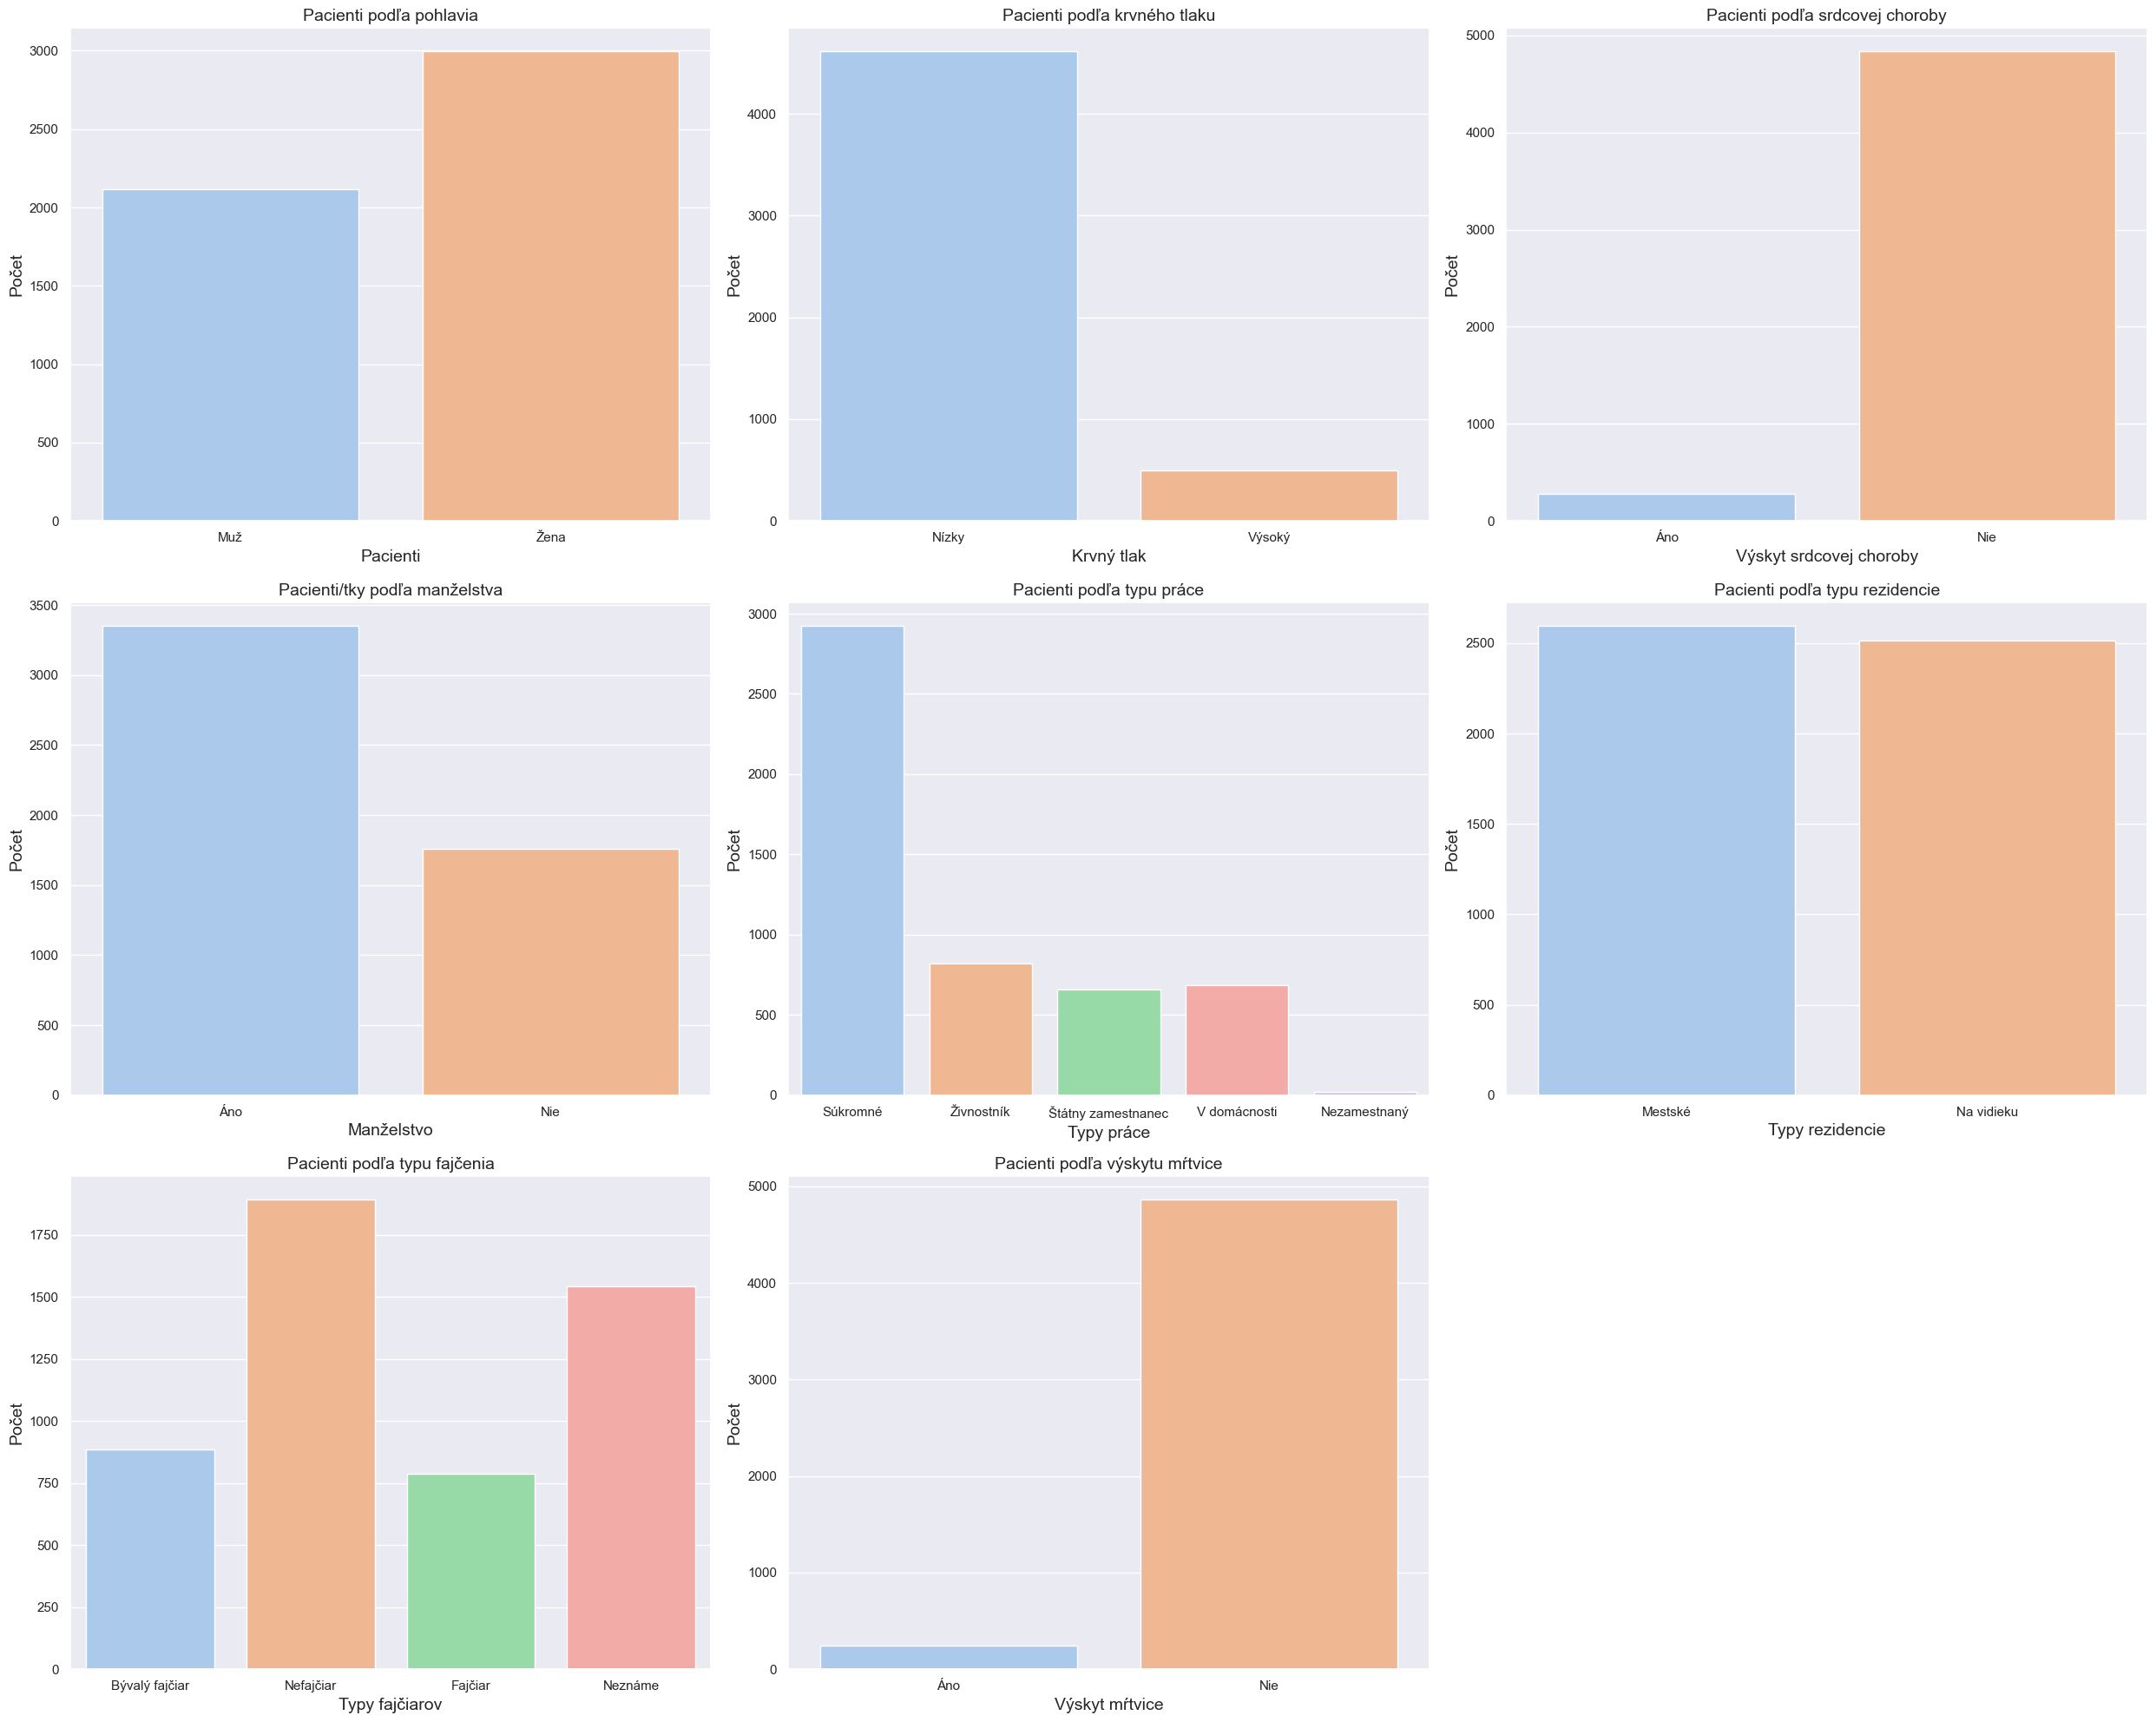

In [16]:
# Vytvorenie figúry a osi pre grafové objekty
fig, axs = plt.subplots(3, 3, figsize=(25, 20))

# Pacienti podľa pohlavia
sns.countplot(data=df, x="pohlavie", ax=axs[0, 0], palette='pastel')
axs[0, 0].set_xlabel("Pacienti", fontsize=14)
axs[0, 0].set_ylabel("Počet", fontsize=14)
axs[0, 0].set_title("Pacienti podľa pohlavia", fontsize=14)

# Pacienti podľa krvného tlaku
sns.countplot(data=df, x="krvny_tlak", ax=axs[0, 1], palette='pastel')
axs[0, 1].set_xlabel("Krvný tlak", fontsize=14)
axs[0, 1].set_ylabel("Počet", fontsize=14)
axs[0, 1].set_title("Pacienti podľa krvného tlaku", fontsize=14)

# Pacienti podľa srdcovej choroby
sns.countplot(data=df, x="srdcova_choroba", ax=axs[0, 2], palette='pastel')
axs[0, 2].set_xlabel("Výskyt srdcovej choroby", fontsize=14)
axs[0, 2].set_ylabel("Počet", fontsize=14)
axs[0, 2].set_title("Pacienti podľa srdcovej choroby", fontsize=14)

# Pacienti podľa manželstva
sns.countplot(data=df, x="manželstvo", ax=axs[1, 0], palette='pastel')
axs[1, 0].set_xlabel("Manželstvo", fontsize=14)
axs[1, 0].set_ylabel("Počet", fontsize=14)
axs[1, 0].set_title("Pacienti/tky podľa manželstva", fontsize=14)

# Pacienti podľa typu práce
sns.countplot(data=df, x="typ_prace", ax=axs[1, 1], palette='pastel')
axs[1, 1].set_xlabel("Typy práce", fontsize=14)
axs[1, 1].set_ylabel("Počet", fontsize=14)
axs[1, 1].set_title("Pacienti podľa typu práce", fontsize=14)

# Pacienti podľa typu rezidencie
sns.countplot(data=df, x="typ_rezidencie", ax=axs[1, 2], palette='pastel')
axs[1, 2].set_xlabel("Typy rezidencie", fontsize=14)
axs[1, 2].set_ylabel("Počet", fontsize=14)
axs[1, 2].set_title("Pacienti podľa typu rezidencie", fontsize=14)

# Pacienti podľa fajčenia
sns.countplot(data=df, x="fajcenie", ax=axs[2, 0], palette='pastel')
axs[2, 0].set_xlabel("Typy fajčiarov", fontsize=14)
axs[2, 0].set_ylabel("Počet", fontsize=14)
axs[2, 0].set_title("Pacienti podľa typu fajčenia", fontsize=14)

# Pacienti podľa výskytu mŕtvice
sns.countplot(data=df, x="mrtvica", ax=axs[2, 1], palette='pastel')
axs[2, 1].set_xlabel("Výskyt mŕtvice", fontsize=14)
axs[2, 1].set_ylabel("Počet", fontsize=14)
axs[2, 1].set_title("Pacienti podľa výskytu mŕtvice", fontsize=14)

# Prázdny subplot, aby sa mohli grafy vykresliť správne
fig.delaxes(axs[2, 2])
plt.tight_layout() 
plt.show()

/var/folders/lc/0tq3t3m97j18yp2pgzc9h2vw0000gn/T/ipykernel_15653/565646081.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y="vekova_skupina", palette='pastel')


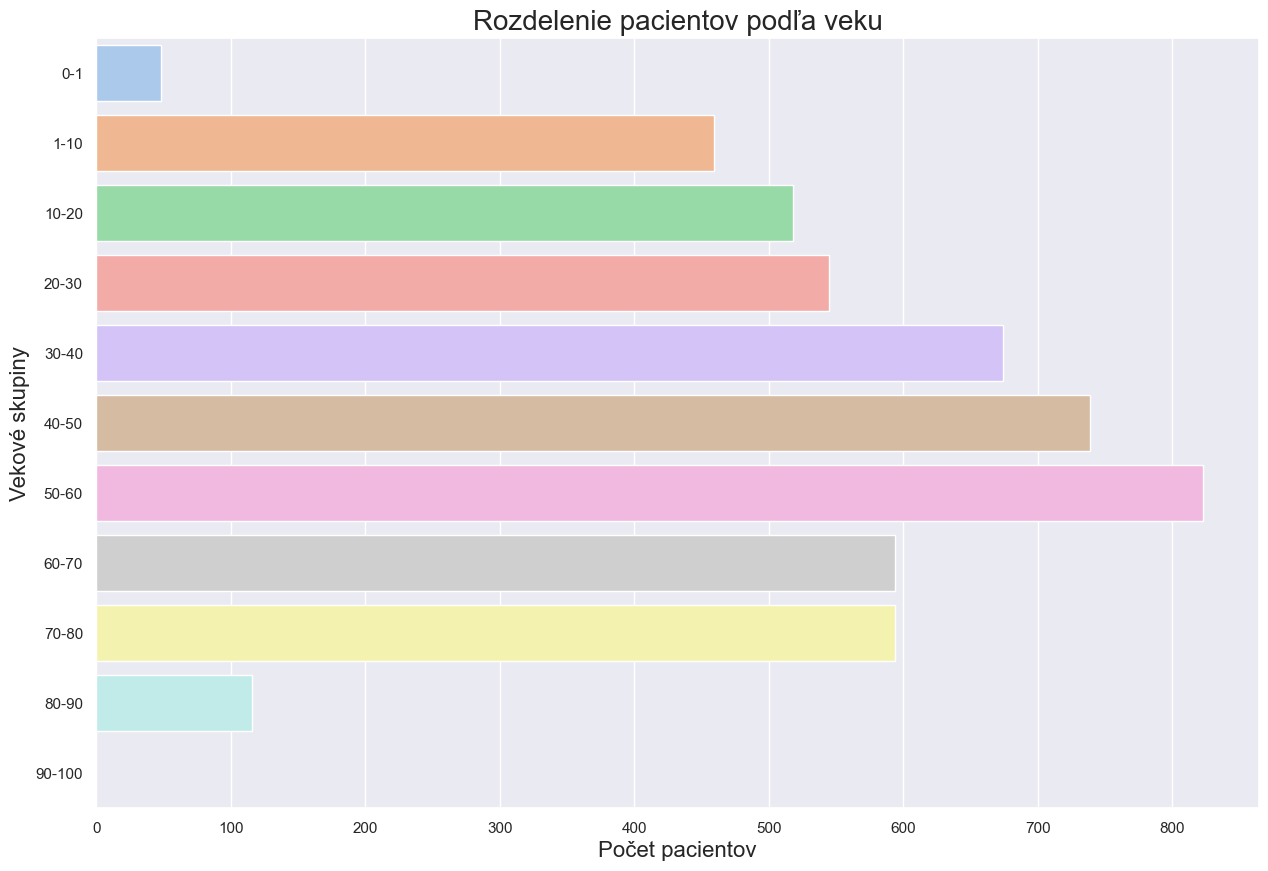

In [17]:
# HISTOGRAM - rozdelenie pacientov do vekových skupín
df['vekova_skupina'] = pd.cut(df['vek'], bins=[0, 1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], labels=['0-1', '1-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100'])

plt.figure(figsize=(15, 10))
sns.countplot(data=df, y="vekova_skupina", palette='pastel')
plt.xlabel("Počet pacientov", fontsize=16)
plt.ylabel("Vekové skupiny", fontsize=16)
plt.title("Rozdelenie pacientov podľa veku", fontsize=20)
plt.show()
